In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel("En_In.xlsx", engine='openpyxl')

df.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321,10,78.669280
1,Albania,102,35,100.000000
2,Algeria,1959,51,0.551010
3,American Samoa,...,...,0.641026
4,Andorra,9,121,88.695650


### Second Task


In [3]:

df['Energy Supply'] = df['Energy Supply'] * 1_000_000

df['Energy Supply'].replace('...', np.nan, inplace=True)

df['Energy Supply'] = pd.to_numeric(df['Energy Supply'], errors='coerce')

df.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10,78.669280
1,Albania,1.020000e+08,35,100.000000
2,Algeria,1.959000e+09,51,0.551010
3,American Samoa,NaN,...,0.641026
4,Andorra,9.000000e+06,121,88.695650


### Third and Forth Tasks


In [5]:
df['Country'] = df['Country'].str.replace(r'\d+|\s*\(.*?\)', '', regex=True)

country_replacements = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}
df['Country'].replace(country_replacements, inplace=True)

df.loc[df['Country'].isin(['American Samoa', 'South Korea', 'Bolivia'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
3,American Samoa,NaN,...,0.641026
24,Bolivia,3.360000e+08,32,31.477120
164,South Korea,1.100700e+10,221,2.279353


### Fifth Task

In [7]:
gpd_df = pd.read_csv('gpd.csv', skiprows=4)

gpd_country_replacements = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
gpd_df['Country Name'].replace(gpd_country_replacements, inplace=True)

gpd_df.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN


### Sixth Task

In [9]:
scimagojr_df = pd.read_excel("scimagojr.xlsx", engine='openpyxl')
scimagojr_df.head()

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57


### Seventh Task

In [11]:
top15_countries = scimagojr_df[scimagojr_df['Rank'] <= 15].set_index('Country')

gpd_last_10_years = gpd_df[['Country Name'] + list(map(str, range(2006, 2016)))].set_index('Country Name')

merged_df = top15_countries.join(df.set_index('Country')).join(gpd_last_10_years)

final_df = merged_df[['Rank', 'Documents', 'Citable documents', 'Citations', 
                       'Self-citations', 'Citations per document', 'H index', 
                       'Energy Supply', 'Energy Supply per Capita', '% Renewable', 
                       '2006', '2007', '2008', '2009', '2010', '2011', 
                       '2012', '2013', '2014', '2015']]


final_df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [12]:
final_df.shape

(15, 20)

### Eighth Task

In [14]:
def task_eight(gpd_df = final_df):
    gpd_last_10_years = gpd_df.loc[:, '2006':'2015']
    
    avg_gpd = gpd_last_10_years.mean(axis=1)
    
    top15_avg_gpd = avg_gpd.nlargest(15)

    result_df = top15_avg_gpd.reset_index()
    result_df.columns = ['Country', '']
    
    return result_df
task_eight()

,Country,
0,United States,1.536434e+13
1,China,6.348609e+12
2,Japan,5.542208e+12
3,Germany,3.493025e+12
4,France,2.681725e+12
5,United Kingdom,2.487907e+12
6,Brazil,2.189794e+12
7,Italy,2.120175e+12
8,India,1.769297e+12
9,Canada,1.660647e+12


### Ninth Task

In [16]:
def task_nine(gdp_df = final_df):
    gdp_last_10_years = gdp_df.loc[:, '2006':'2015']
    
    avg_gdp = gdp_last_10_years.mean(axis=1)
    
    fifth_largest_country = avg_gdp.nlargest(5).index[-1]
    
    country_gdp_data = gdp_last_10_years.loc[fifth_largest_country]
    
    initial_gdp = country_gdp_data['2006']
    final_gdp = country_gdp_data['2015']
    
    gdp_change = final_gdp - initial_gdp
    
    return (fifth_largest_country, gdp_change)

task_nine()

('France', 153345695364.24023)

### Tenth Task

In [18]:
def task_ten(energy_df = final_df):
    max_renewable_country = energy_df['% Renewable'].idxmax()
    
    max_renewable_value = energy_df['% Renewable'].max()
    
    return (max_renewable_country, max_renewable_value)

task_ten()

('Brazil', 69.64803)

### Eleventh Task

In [20]:
def task_eleven(energy_df = final_df):
    energy_df['Estimated Population'] = energy_df['Energy Supply'] / energy_df['Energy Supply per Capita']
    
    sixth_country = energy_df.sort_values(by='Estimated Population', ascending=False).iloc[5]
    
    return (sixth_country.name, sixth_country['Estimated Population'])
task_eleven()

('Japan', 127409395.97315437)

### Twelveth Task

In [22]:
def task_twelve(energy_df = final_df):
    energy_df['Citable Documents per Capita'] = energy_df['Citable documents'] / energy_df['Estimated Population']
    
    correlation = energy_df['Citable Documents per Capita'].corr(energy_df['Energy Supply per Capita'])
    
    return correlation
task_twelve()

0.7940010435442946

### Thirteenth Task

In [24]:
def task_thirteen(energy_df = final_df):
    median_renewable = energy_df['% Renewable'].median()
    
    energy_df['Renewable Indicator'] = (energy_df['% Renewable'] >= median_renewable).astype(int)
    
    return energy_df['Renewable Indicator']

task_thirteen()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: Renewable Indicator, dtype: int32

### Fourteenth Task

In [26]:
final_df.reset_index(inplace=True)

ContinentDict = {
    'China': 'Asia',
    'United States': 'North America',
    'Japan': 'Asia',
    'United Kingdom': 'Europe',
    'Russian Federation': 'Europe',
    'Canada': 'North America',
    'Germany': 'Europe',
    'India': 'Asia',
    'France': 'Europe',
    'South Korea': 'Asia',
    'Italy': 'Europe',
    'Spain': 'Europe',
    'Iran': 'Asia',
    'Australia': 'Australia',
    'Brazil': 'South America'
}

final_df.rename(columns={'index': 'Country'}, inplace=True)

final_df['Continent'] = final_df['Country'].map(ContinentDict)

def task_fourteen(final_df=final_df):
    continent_stats = final_df.groupby('Continent')['Estimated Population'].agg(
        size='size',
        sum='sum',
        mean='mean',
        std='std'
    ).fillna(0)

    return continent_stats
task_fourteen()

,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,0.000000e+00
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,0.000000e+00


### Fifteenth Task

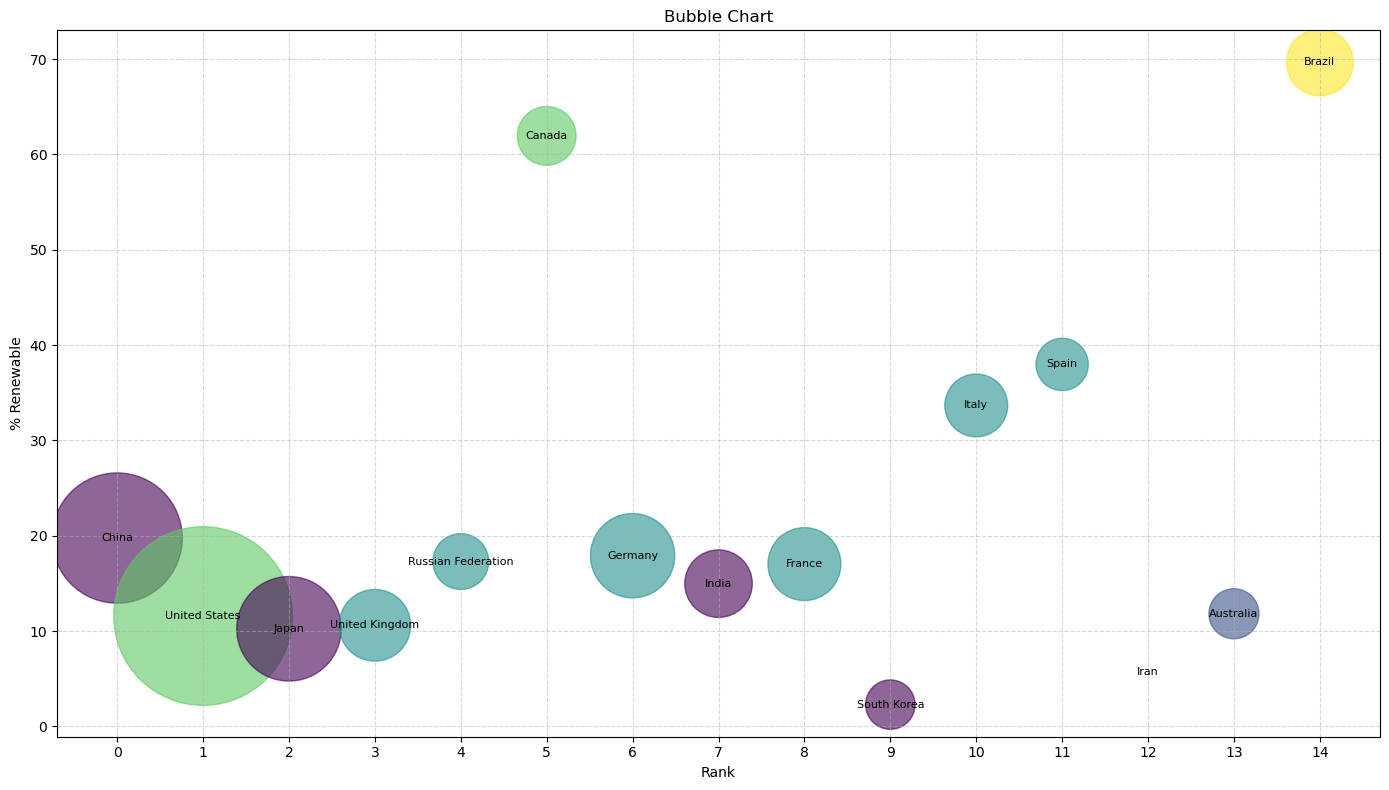

In [47]:
import matplotlib.pyplot as plt

if 'Country' in final_df.columns:
    final_df.set_index('Country', inplace=True)

final_df['Continent'] = final_df.index.map(ContinentDict)

bubble_size = final_df['2015'] / 1e9

country_indices = np.arange(len(final_df))

plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    country_indices,
    final_df['% Renewable'],
    s=bubble_size,
    c=final_df['Continent'].astype('category').cat.codes,
    alpha=0.6,
    cmap='viridis'
)

plt.xlabel('Rank')
plt.ylabel('% Renewable')
plt.title('Bubble Chart')

plt.xticks(country_indices)

plt.grid(True, linestyle='--', alpha=0.5)

for i, country in enumerate(final_df.index):
    x = country_indices[i]
    y = final_df['% Renewable'].iloc[i]
    plt.text(x, y, country, fontsize=8, ha='center', va='center')

plt.tight_layout()

plt.show()